<a href="https://colab.research.google.com/github/DONGJUSEO/bayesian_lab/blob/master/4_5_Bayesian_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today's 세미나 목차

---

1.   1 & 2주차 내용 복습

1.  R vs Python 비교

1.   PyMC란?

1.   PyMC vs MCMCPACK with disaster data

1.   프로그래머를 위한 베이지안 with 파이썬(2장)

# 1. 1 & 2주차 내용 복습

---
1. 1주차 :  열정남1 성균이의 주피터노트북 [[링크 텍스트](https://nbviewer.jupyter.org/github/sk-rhyeu/bayesian_lab/blob/master/3_8_Bayesian_with_python_Intro.ipynb)]
2. 2주차 : 열정남2 지현이의 PPT

# 2. R vs Python 비교

---
참고 : https://www.youtube.com/watch?v=jLGsrGk2pDU

1.   R


*   장점


> 1) 데이터 마이닝/ 통계분석을 위한 자료 및 패키지가 매우 많음 (R의 주목적)

> 2) 이미 검증된 머신러닝 알고리즘 코딩 자료가 굉장히 많음 (ex. SVM)

> 3) 고퀄, 대용량의 인공지능 코드 자료가 많음 (구글링 최고!)

> 4) 연구, 분석, 실험 목적의 프로그래밍로서 적합


*  단점

> 1) 언어 자체가 오래되서 효율성이 떨어짐 (R : 100줄 vs Python: 30줄)

> 2) 입문자가 배우기 어려운 구조

> 3) 서비스, 어플리케이션과 같이 실제 시스템을 구현하기에 많은 어려움이 따름




---



---


2.   Python


*   장점

> 1) 언어가 간결하여 입문자가 배우기 쉬움

> 2) 파이썬으로 만든 서비스나 어플리케이션등 상용화가 잘 되어있음 (개발언어로 적합)

>3) 인공지능, 딥러닝을 지원하기에 최적화 (필수)

> 4) 실제 환경에서 수집된 '리얼 데이터'로 머신러닝 하기에 적합 (R과의 가장 큰 차이점)


*   단점

> 1) R에 비하여 상대적으로 라이브러리/패키지가 적음

> 2) 파이썬 기반의 데이터마이닝 코드가 많지 않음 (기본만 있음)


# 3. PyMC란?

---



 참고 :  https://en.wikipedia.org/wiki/PyMC3



*  베이지안 분석을 위한 파이썬 라이브러리( Vs in R MCMCPACK)


*   MCMC 기법 알고리즘에 초점을 맞춤
*   Based on theano (행렬 값등 수학적 표현을 최적화 하는 라이브러리)

*   천문학, 분자생물학,생태학,심리학등 여러 과학 분야의 추론 문제를 해결하기 위해  많이 사용

*   Stan과 함께 가장 인기 있는 프로그래밍 도구  (여기서 Stan은 C++쓰여진 통계 추론을 위한 프로그래밍 언어)



*   현재 PyMC4 버젼까지 출시

# 4. 2장  PyMC 더 알아보기

---



1.   서론

1.  모델링방법

1.   우리의 모델이 적절한가?

1.   결론

1.   부록












# 2.1.1 부모와 자식 관계

- 부모변수는 다른 변수에 영향을 주는 변수다.
- 자식변수는 다른 변수의 영향을 받는 변수다. 즉, 부모변수에 종속된다.
- 어느 변수라도 부모 변수가 될 수 있으며, 동시에 자식변수가 될 수 있다.

In [1]:
!pip install pymc

    100% |████████████████████████████████| 358kB 24.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/e4/6d/cf/3c408a39cf0f43e3b8abcace9758575f29c6aa860e17e9222d
Successfully built pymc


In [0]:
import pymc as pm

import matplotlib
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
lambda_ = pm.Exponential("poisson_param", 1)
# used in the call to the next variable...
data_generator = pm.Poisson("data_generator", lambda_)
data_plus_one = data_generator + 1

In [3]:
print ("Children of ‘lambda_’: ")
print (lambda_.children)
print ("\nParents of ‘data_generator’: ")
print (data_generator.parents)
print ("\nChildren of ‘data_generator’: ")
print (data_generator.children)

Children of ‘lambda_’: 
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x7fceb80cf668>}

Parents of ‘data_generator’: 
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x7fceb80cf630>}

Children of ‘data_generator’: 
{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x7fceb2217cc0>}


# 2.1.2 PyMC 변수

- 모든 PyMC 변수는 value 속성을 가짐
- 변수의 현재 (가능한 난수) 내부 값을 만듬 ( P(theta|y) )


1.   stochastic 변수 (확률적인 변수, stochastic process : RV 들의 집합)

> 1) 값이 정해지지 않은 변수

> 2) 부모변수의 값을 모두 알고 있어도 여전히 난수

> 3) ex) Possion, DiscreteUniform, Exponential

> 4) random() 로 메서드 호출




2.  deterministic 변수(결정론적인 변수)

> 1) 변수의 부모를 모두 알고 있는 경우에 랜덤하지 않은 변수

> 2) @pm.deterministic 로 선언



> ex) A deterministic variable is the variable that you can predict with almost 100% accuracy. For example, your age is x this year and it is definitely gonna be x+1 next year. Whether you alive or otherwise. So age is a deterministic variable in this case.









In [4]:
print ("lambda_.value =", lambda_.value)
print ("data_generator.value =", data_generator.value)
print ("data_plus_one.value =", data_plus_one.value)

lambda_.value = 3.202853338156562
data_generator.value = 5
data_plus_one.value = 6


In [5]:
lambda_1 = pm.Exponential("lambda_1", 1)  # prior on first behaviour
lambda_2 = pm.Exponential("lambda_2", 1)  # prior on second behaviour
tau = pm.DiscreteUniform("tau", lower=0, upper=10)  # prior on behaviour change
print ("Initialized values...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value, "\n")

lambda_1.random(), lambda_2.random(), tau.random()

print("After calling random() on the variables...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value)

Initialized values...
lambda_1.value = 0.610
lambda_2.value = 0.892
tau.value = 7.000 

After calling random() on the variables...
lambda_1.value = 0.169
lambda_2.value = 0.863
tau.value = 1.000


In [6]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

In [0]:
import numpy as np
n_data_points = 5  # in CH1 we had ~70 data points


@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after tau is lambda2
    return out

# 2.13 모델에 관측 포함하기

*   P(theta)를 구체적으로 지정 (주관적)
*   P(theta | y) = P(theta,y) / P(y) = P(y|theta)P(theta) / P(y) proportional P(y |theta)P(theta)



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


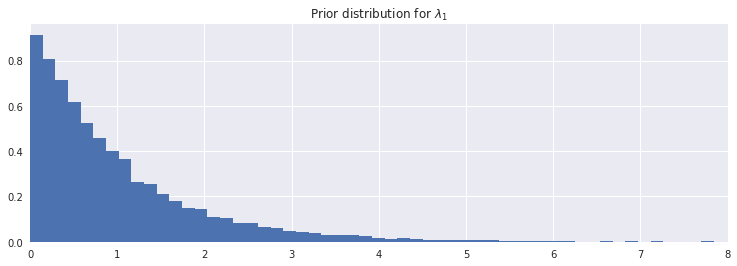

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)


samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [9]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")
fixed_variable.random()
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [10]:

# We're using some fake data here
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


# 2.14 마지막으로

*   model = pm.Model ([obs,lambda_,lambda_1,lambda_2,tau])



In [0]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

# 2.2 모델링 방법

- 우리의 데이터가 어떻게 만들어졌을까?



1.   데이터를 나타내는 최고의 확률변수 -> 분포

1.   분포에 정의되어야 하는 모수

> 1) 초기 행동에 대한 것

> 2) 사후 행동에 대한 것

> 3) 변환점 T(행동이 언제 바뀌는지 알지 못함) -> 전문전인 견해가 없는 경우 이산균등분포로 가정


3.   1) 과 2)의 모수에 대한 바람직한 확률분포


> -믿음이 강력하지 않은 경우 모델링을 중단하는 것이 최선, 모수끼리 연관성 있게 설정하는 것이 좋음




















# 2.2.1 같은스토리, 다른 결말

*   2.2장의 순서를 역행하면 새로운 데이터셋을 만들 수 있음
*   가상 데이터셋이 우리가 관측한 데이터셋처럼 보이지 않아도 괜찮음 (같은 데이터셋이 될 확률이 상당히 낮음)


*   PyMC의 베이지 이러한 확률을 극대화하는 좋은 모수를 찾도록 설계 되어있음
*   베이지안 추론의 매우 중요한 방법

*   이 방법을 모델의 적합성을 검증함






In [12]:

tau = pm.rdiscrete_uniform(0, 80)
print(tau)

14


In [13]:

alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

9.873985541060504 36.77331860821823


In [14]:

lambda_ = np.r_[ lambda_1*np.ones(tau), lambda_2*np.ones(80-tau) ]
print (lambda_)

[ 9.87398554  9.87398554  9.87398554  9.87398554  9.87398554  9.87398554
  9.87398554  9.87398554  9.87398554  9.87398554  9.87398554  9.87398554
  9.87398554  9.87398554 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861 36.77331861
 36.77331861 36.77331861]


In [15]:
data = pm.rpoisson(lambda_)
print (data)

[ 8  8 11  7  5  7 12  9  8  6  2 11 14  9 43 44 32 35 46 32 31 33 44 35
 46 36 35 38 39 33 31 31 34 37 40 40 30 40 32 39 30 40 38 35 34 35 45 39
 28 28 27 34 36 24 33 24 42 37 34 30 36 36 40 35 42 33 45 42 36 45 45 41
 28 47 32 27 33 27 40 24]


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


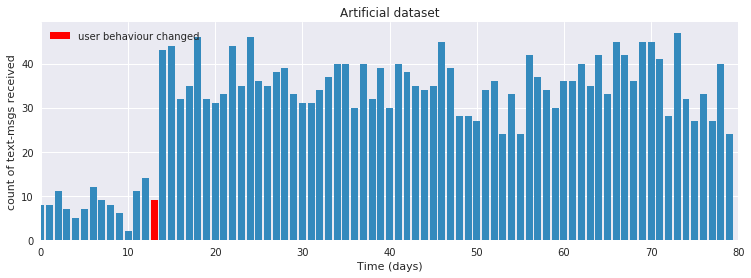

In [16]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend();

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


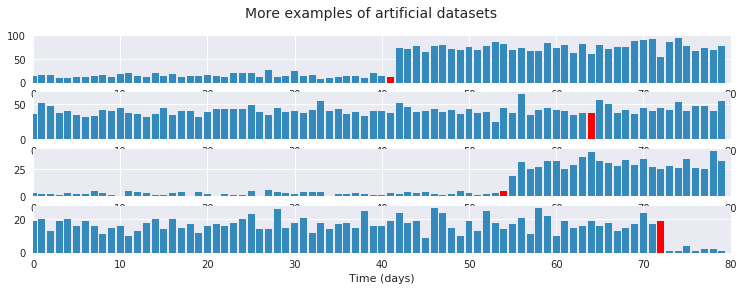

In [17]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau - 1], color="r", label="user behaviour changed")
    plt.xlim(0, 80)
    plt.xlabel("Time (days)")
plt.ylabel("Text messages received")
figsize(12.5, 5)
plt.suptitle("More examples of artificial datasets", fontsize=14)
for i in range(1, 5):
    plt.subplot(4, 1, i)
    plot_artificial_sms_dataset()

# 2.2.2 예제 : 베이지안 A/B 테스트
 

*   서로 다른 두 가지 방법 간의 효과의 차이를 밝히기 위한 통계적 디자인 패턴  (Two sample t-test)

*   핵심은 그룹 간의 차이점이 단 하나뿐이라는 점, 측정값의 의미 있는 변화가 바롸 차이로 연결됨

*   사후실험분석은 보통 평균차이검정 or 비율차이검정과 같은 '가설검정' 사용 -> Z스코어 or P-value 관련
<-> Bayes factor : 값이 커질수록 귀무가설이 채택 가능성이 커진다 (강한 증거)

# 2.2.3 간단한 예제

*   전환율 : 웹사이트 방문자가 회원으로 가입하거나, 무언가를 구매하거나, 기타 다른 행동을 하는 것을 말함

*   PA : A사이트에 노출된 사용자가 궁극적으로 전환할 어떤 확률 (A사이트의 진정한 효율성, 알지 못함)


> 1) A 사이트가 N명에게 노출, n명이 전환했다고 가정

> 2) 관측된 빈도 n /N 이 반드시 PA랑 같은건 아님 -> 관측된 빈도와 사건의 실제 빈도 간에는 차이가 있음

> ex)  육면체 주사위를 굴려 1이 나오는 실제 확률은 1/6 , 하지만 6번 굴려서 1을 한번도 관측하지 못할 수 있음 (관측된 빈도)

> 3) 노이즈와 복잡성 때문에 실제 빈도를 알지 못하여 관측된 데이터로 실제 빈도를 추론 해야함

> 4) 베이지안 통계를 사용하여 적절한 사전확률 및 관측된 데이터를 사용하여 실제 빈도의 추정 값을 추론

> 5) 현재 PA에 대한 확신이 강하지 않기 때문에 균등분포로 가정

> 6) PA=0.05, 사이트에 노출된 사용자 수 N=1,500 이라 가정, X= 사용자가 구매를 했는지 혹은 하지 않았는지 여부 -> 베르누이분포 사용

> 결론 : 우리의 사후확률분포는 데이터가 제시하는 진짜 PA 값 주변에 가중치를 둠


In [0]:
import pymc as pm

# The parameters are the bounds of the Uniform.
p = pm.Uniform('p', lower=0, upper=1)

In [19]:

# set constants
p_true = 0.05  # remember, this is unknown.
N = 1500

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
occurrences = pm.rbernoulli(p_true, N)

print(occurrences)  # Remember: Python treats True == 1, and False == 0
print(occurrences.sum())

[False False False ... False False False]
68


In [20]:

# Occurrences.mean is equal to n/N.
print("What is the observed frequency in Group A? %.4f" % occurrences.mean())
print("Does this equal the true frequency? %s" % (occurrences.mean() == p_true))

What is the observed frequency in Group A? 0.0453
Does this equal the true frequency? False


In [21]:
# include the observations, which are Bernoulli
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

# To be explained in chapter 3
mcmc = pm.MCMC([p, obs])
mcmc.sample(18000, 1000)

 [-----------------100%-----------------] 18000 of 18000 complete in 1.3 sec

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


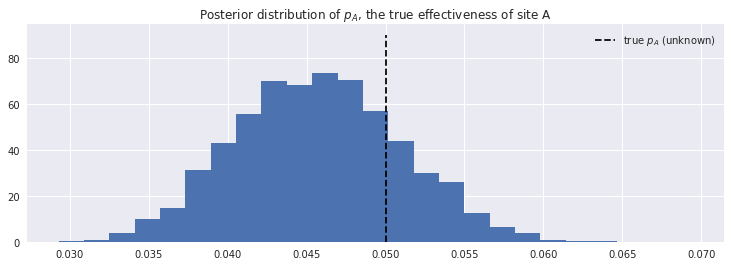

In [22]:
figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(mcmc.trace("p")[:], bins=25, histtype="stepfilled", normed=True)
plt.legend();

# 2.2.4 A와B를 묶어보기

1.   위와 같이 PB도 시행

1.   delta=PA-PB, PA, PB 함께 추론



In [23]:
import pymc as pm
figsize(12, 4)

# these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

# notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

# generate some observations
observations_A = pm.rbernoulli(true_p_A, N_A)
observations_B = pm.rbernoulli(true_p_B, N_B)
print("Obs from Site A: ", observations_A[:30].astype(int), "...")
print("Obs from Site B: ", observations_B[:30].astype(int), "...")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


In [24]:
print(observations_A.mean())
print(observations_B.mean())

0.048666666666666664
0.04133333333333333


In [25]:
# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)


# Define the deterministic delta function. This is our unknown of interest.
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

# Set of observations, in this case we have two observation datasets.
obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

# To be explained in chapter 3.
mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 2.4 sec

In [0]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


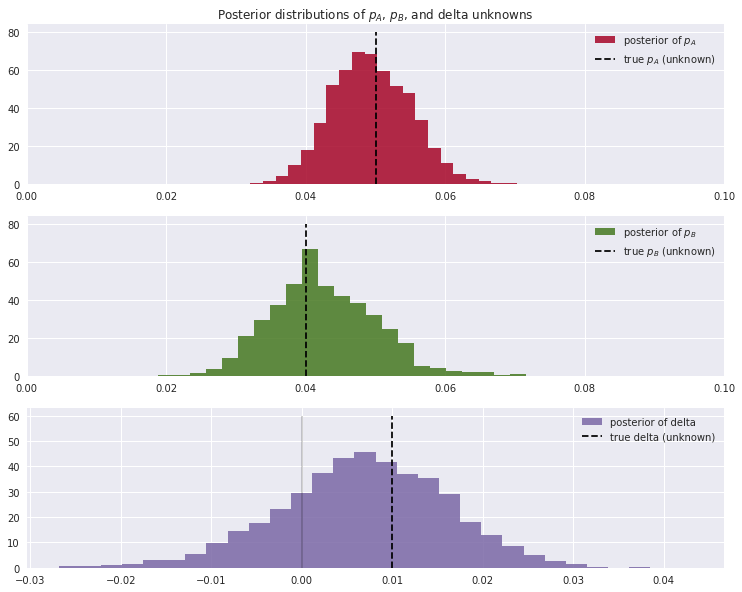

In [27]:
figsize(12.5, 10)

# histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

# 위 그래프 해석


*   PA 보다 PB의 사후확률분포가 더 평평 (PB의 sample size가 더 적음) -> PB의 실제 값에 대한 확신이 부족

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


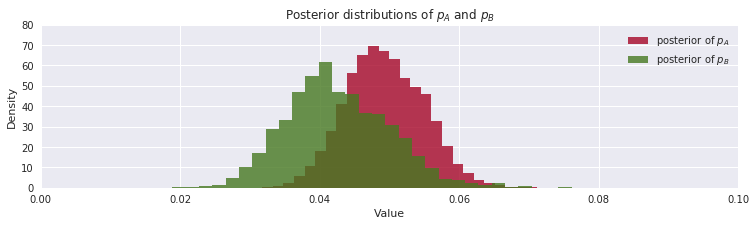

In [28]:
figsize(12.5, 3)
# histogram of posteriors
plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.80,
label="posterior of $p_A$", color="#A60628", normed=True)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.80,
label="posterior of $p_B$", color="#467821", normed=True)
plt.legend(loc="upper right")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Posterior distributions of $p_A$ and $p_B$")
plt.ylim(0,80);

# 위 그래프 해석


*   delta의 사후확률분포 대부분이 0이상, 즉 A사이트의 응답이 B사이트보다 낫다는 것을 의미함 (구매수가 많다는 것)







In [29]:

# Count the number of samples less than 0, i.e. the area under the curve
# before 0, represent the probability that site A is worse than site B.
print("Probability site A is WORSE than site B: %.3f" % \
    (delta_samples < 0).mean())

print("Probability site A is BETTER than site B: %.3f" % \
    (delta_samples > 0).mean())

Probability site A is WORSE than site B: 0.219
Probability site A is BETTER than site B: 0.781


# 2.2.4 결론


*   주목할 점은 A사이트와 B사이트의 표본 크기 차이가 언급되지 않았다는 점 -> 이런 경우 베이지안 추론이 적합한 방법
*  가설검정보다 A/B 테스트가 더 자연스러움



# 2.2.5 예제 : 거짓말에 대한 알고리즘


*   솔직한 답변의 실제 비율은 관측한 데이터보다 적을 수 있음


> ex) " 문항이 시험에서 부정행위를 한 적이 있는가?"







# 2.2.6 이항분포

*   두 개의 모수 N과 P를 가짐
*   P가 클수록 사건이 일어날 가능성이 커짐

*   N=1 경우 베르누이분포임, 크기가 0부터 N이고 모수 P를 가진 베르누이 확률변수들의 합이 이항분포를 따름





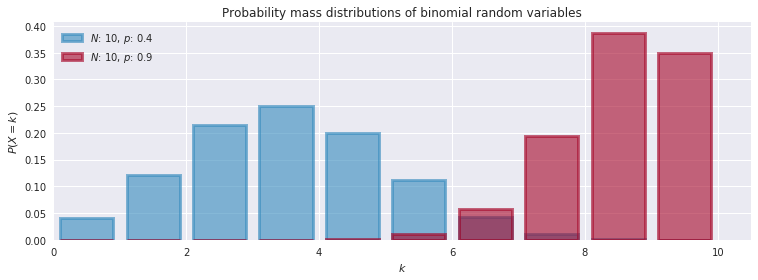

In [30]:
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

# 2.2.7 예제 : 학생들의 부정행위

*   주제 : 이항분포를 사용하여 시험 중에 부정행위를 저지르는 빈도를 알아내는 것

*  더 나은 결과를 위하여 새로운 알고리즘 제시 ( Called 프라이버시 알고리즘)


>  1) 동전의 앞면이 나온 학생은 정직하게 대답

>  2) 동전의 뒷면이 나온 학생은 동전을 다시 던져 앞면이 나오면 "부정행위 인정 대답", 뒷면이 나오면 "부정행위 부정 대답"

> 위와 같은 방법 사용시 "부정행위 인정 대답" 이 부정행위를 인정한 진술의 결과인지 아니면 두번째 동전 던지기에서 앞면이 나온 결과인지 모름 -> 프라이버시는 지켜지고 연구자는 정직한 답변을 받음


*   예제 : 100명 조사하여 부정행위자 비율인 P를 찾으려 함, 현재 정보가 없으므로 P의 사전확률로 균일분포 가정










In [0]:
import pymc as pm

N = 100
p = pm.Uniform("freq_cheating", 0, 1)

In [0]:
true_answers = pm.Bernoulli("truths", p, size=N)

In [33]:
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
print(first_coin_flips.value)

[False False  True  True  True False  True False False  True False  True
 False  True  True False  True False  True False  True False False  True
 False False False False  True  True  True False False  True  True False
  True  True False False  True  True  True False False False False  True
  True  True False  True  True  True  True  True  True  True False False
  True False False False False False  True False False  True False False
 False  True False  True False False False  True  True False  True  True
  True False  True  True False False False False  True  True  True  True
  True  True  True  True]


In [0]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

In [0]:
@pm.deterministic
def observed_proportion(t_a=true_answers,
                        fc=first_coin_flips,
                        sc=second_coin_flips):

    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(N)

In [36]:
observed_proportion.value

0.67

In [0]:

X = 35

observations = pm.Binomial("obs", N, observed_proportion, observed=True,
                           value=X)

In [38]:

model = pm.Model([p, true_answers, first_coin_flips,
                  second_coin_flips, observed_proportion, observations])

# To be explained in Chapter 3!
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

TypeError: ignored

In [0]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)
plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior distribution of parameter $p$")
plt.legend();

# 위 그래프 해석



*   P는 부정행위를 했을 확률를 의미

*   0.05 ~ 0.35 사이의 범위로 좁혀짐 ('0.3'이라는 범위 내에 참 값이 존재할 가능성이 있음)

*   이런 종류의 알고리즘은 사용자의 개인정보를 수집하는 데 사용될 수도 있음



### 2.2.8 PyMC 대안 모델

*   P("예") = P(첫 동전의 앞면)P(부정행위자) + P(첫 동전의 뒷면)P(두 번째 동전의 앞면) =  P/2 + 1/4
*   P를 알고 있다면 우리는 한 학생이 "예" 라고 대답할 확률을 계산할 수 있음(P로 deterministic 함수 사용)



In [0]:
p = pm.Uniform("freq_cheating", 0, 1)


@pm.deterministic
def p_skewed(p=p):
    return 0.5 * p + 0.25

In [0]:
yes_responses = pm.Binomial("number_cheaters", 100, p_skewed,
                            value=35, observed=True)

In [41]:
model = pm.Model([yes_responses, p_skewed, p])

# To Be Explained in Chapter 3!
mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)

 [-----------------100%-----------------] 25000 of 25000 complete in 1.0 sec

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


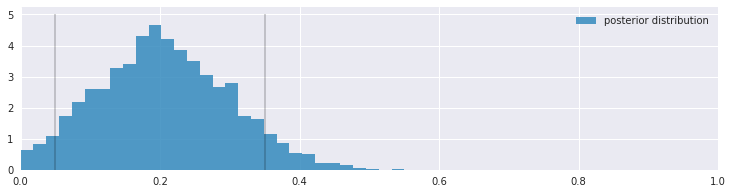

In [42]:

figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.2)
plt.xlim(0, 1)
plt.legend();

# 2.2.9 더 많은 PyMC 기법들

*   인덱싱이나 슬라이싱 같은 연산 -> 내장된 Lambda 함수를 사용하여 더 간결하고 단순하게 다룰 수 있음


In [43]:
beta = pm.Normal("coefficients",0,size=(N,1))
x = np.random.randn((N,1))
Linear_combination = pm.Lambda(labmda x=x, beta=beta: np.dot(x.T,beta))

SyntaxError: ignored

In [0]:
N = 10
x = np.empty(N, dtype=object)
for i in range(0, N):
    x[i] = pm.Exponential('x_%i' % i, (i + 1) ** 2)

# 2.2.10 예제 :우주 왕복선 챌린저호 참사

*   사건의 요약

> 1) 25번째 우주 왕복선 비행이 참사로 끝남

> 2) 원인 : 로켓 부스터에 연결된 O링의 결함으로 발생, O링을 외부 온도를 포함하여 많은 요인에 너무 민감하게 반응하여 설계했기 때문

> 3) 이전 24번의 비행에서 23번째 비행 시 O링의 결함에 대한 데이터는 유용

> 4) 7번째 비행에 해당하는 데이터만 중요하게 고려됨


*   외부 온도와 사건 발생을 비교하여 둘의 관계를 파악

In [44]:
figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)
challenger_data = np.genfromtxt(r"C:\Users\wh\006775\Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master\Chapter2_MorePyMC\data\challenger_data.csv", skip_header=1,
                                usecols=[1, 2], missing_values="NA",
                                delimiter=",")
# drop the NA values
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]

# plot it, as a function of temperature (the first column)
print("Temp (F), O-Ring failure?")
print(challenger_data)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k",
            alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside temperature (Fahrenheit)")
plt.title("Defects of the Space Shuttle O-Rings vs temperature");

OSError: ignored

# 위 그래프 해석

참고 : https://blog.naver.com/varkiry05/221057275615 (about 로지스틱 함수)

*   외부 온도가 낮아질수록 피해 사고가 발생할 확률이 증가
*   목적 : 모델링을 통하여 "온도 t에서 손실 사고의 확률은 얼마인가?"

*   온도 함수에 로지스틱함수 사용 : P(t) = 1/1+e^beta*t





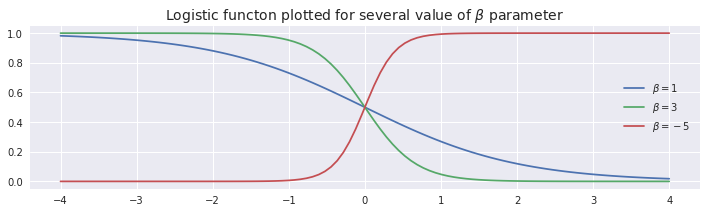

In [45]:

figsize(12, 3)


def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

x = np.linspace(-4, 4, 100)
plt.plot(x, logistic(x, 1), label=r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$")
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$")
plt.title("Logistic functon plotted for several value of $\\beta$ parameter", fontsize=14)
plt.legend();

# 위 그래프 해석


*   Beta에 대한 확신이 없으므로 1, 3, -5 여러 값 대입

*   로지스틱함수에서 확률은 0근처에서만 변하지만, 그림 2-11에서 확률은 화씨 65~70도 근처에서 변함 -> 편향 
(bias ) 추가

*  P(t) = 1/1+e^beta*t+alpha (alpha가 추가됨)







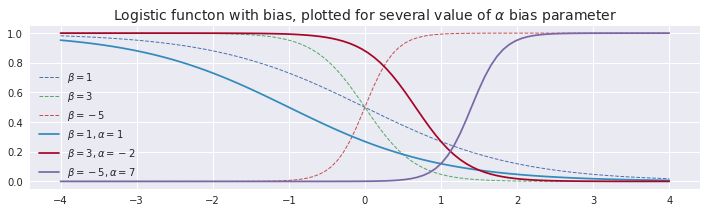

In [46]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw=1)
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw=1)
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$", ls="--", lw=1)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha = 1$",
         color="#348ABD")
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha = -2$",
         color="#A60628")
plt.plot(x, logistic(x, -5, 7), label=r"$\beta = -5, \alpha = 7$",
         color="#7A68A6")

plt.title("Logistic functon with bias, plotted for several value of $\\alpha$ bias parameter", fontsize=14)
plt.legend(loc="lower left");

# 위 그래프 해석
  
*   여러 alpha 값 대입 (1, -2, 7)

*   alpha 값 대입을 통하여 곡선을 왼쪽 또는 오른쪽으로 이동 (편향)



# 2.2.11 정규분포


*  정규분포의 모수 : 평균과 정밀도 (분산의 역수, 정밀도가 커질수록 분포는 좁아짐)
*  X ~ N(M, 1/T) = N(M, 시그마^2)



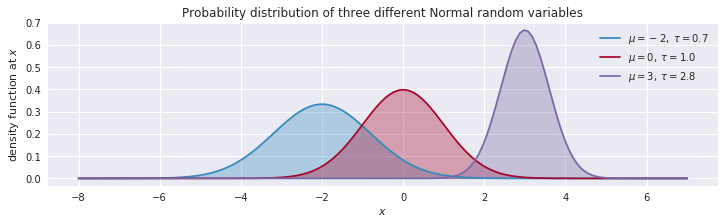

In [47]:
import scipy.stats as stats

nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, tau, colors)

for _mu, _tau, _color in parameters:
    plt.plot(x, nor.pdf(x, _mu, scale=1. / np.sqrt(_tau)),
             label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1. / np.sqrt(_tau)), color=_color,
                     alpha=.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title("Probability distribution of three different Normal random \
variables");

In [48]:
import pymc as pm

temperature = challenger_data[:, 0]
D = challenger_data[:, 1]  # defect or not?

# notice the`value` here. We explain why below.
beta = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)


@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta):
    return 1.0 / (1. + np.exp(beta * t + alpha))

NameError: ignored

# 위 그래프 해석


*  결함사고, Di ~ Ber( p(ti)) , i=1,2,...,N
*  p(t)는 로지스틱함수, t는 관측한 온도

*   beta 와 alpha의 값을 0으로 설정 ( 너무 크면 p는 0 또는 1) -> 결과에 영향 X, 사전확률에 어떤 부가적인 정보를 포함한다는 의미가 아님




In [49]:
p.value

array(0.081)

In [50]:
# connect the probabilities in `p` with our observations through a
# Bernoulli random variable.
observed = pm.Bernoulli("bernoulli_obs", p, value=D, observed=True)

model = pm.Model([observed, beta, alpha])

# Mysterious code to be explained in Chapter 3
map_ = pm.MAP(model)
map_.fit()
mcmc = pm.MCMC(model)
mcmc.sample(120000, 100000, 2)

NameError: ignored

In [0]:

alpha_samples = mcmc.trace('alpha')[:, None]  # best to make them 1d
beta_samples = mcmc.trace('beta')[:, None]

figsize(12.5, 6)

# histogram of the samples:
plt.subplot(211)
plt.title(r"Posterior distributions of the variables $\alpha, \beta$")
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"1 posterior of $\beta$", color="#7A68A6", normed=True)
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"2 posterior of $\alpha$", color="#A60628", normed=True)
plt.legend();

# 위 그래프 해석

*   beta의 모든 표본값은 0보다 큼 -> 사후확률이 0 주변에 집중되었다면 온도가 결함의 확률에 아무런 영향을 주지 않았다는 것을 암시
*   alpha 또한 마찬가지 (0과 거리가 멀다)

*   너비가 넓을수록 모수에 대한 확신이 없음을 의미





In [51]:
t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)

mean_prob_t = p_t.mean(axis=0)

NameError: ignored

In [52]:

figsize(12.5, 4)

plt.plot(t, mean_prob_t, lw=3, label="average posterior \nprobability \
of defect")
plt.plot(t, p_t[0, :], ls="--", label="realization from posterior")
plt.plot(t, p_t[-2, :], ls="--", label="realization from posterior")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.title("Posterior expected value of probability of defect; \
plus realizations")
plt.legend(loc="lower left")
plt.ylim(-0.1, 1.1)
plt.xlim(t.min(), t.max())
plt.ylabel("probability")
plt.xlabel("temperature");

NameError: ignored

In [53]:
from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("Posterior probability estimates given temp. $t$");

NameError: ignored

# 위 그래프 해석

*   ex) 65도에서 우리는 0.25 ~ 0.75 사이에 결함확률이 있다고 95% 확신할 수 있다 (베이지안의 신용구간 해석)

1.   신뢰구간 (Confidence interval) vs 신용구간 (Credible interval)

참고 : https://freshrimpsushi.tistory.com/752

In [55]:
figsize(12.5, 2.5)

prob_31 = logistic(31, beta_samples, alpha_samples)

plt.xlim(0.995, 1)
plt.hist(prob_31, bins=1000, normed=True, histtype='stepfilled')
plt.title("Posterior distribution of probability of defect, given $t = 31$")
plt.xlabel("probability of defect occurring in O-ring");

NameError: ignored

# 2.2.12 챌린저호 참사 당일에는 무슨 일이 일어났는가?

*   참사 당일 외부 온도는 화씨 31도 (=섭씨-0.5도)



# 2.3 우리의 모델이 적절한가?

*   모델이 우수하다 : 데이터를 잘 표현한다
*   모델의 우수성을 어떻게 평가?

> 1) 관측 데이터(고정된 확률변수) 와 우리가 시뮬레이션하는 인위적인 데이터셋을 비교

> 2) 새로운 Stochastic 변수를 만듬 (단 관측 데이터 자체는 빼야 함)












In [57]:
simulated = pm.Bernoulli("bernoulli_sim", p)
N = 10000

mcmc = pm.MCMC([simulated, alpha, beta, observed])
mcmc.sample(N)

NameError: ignored

In [58]:
figsize(12.5, 5)

simulations = mcmc.trace("bernoulli_sim")[:]
print(simulations.shape)

plt.title("Simulated dataset using posterior parameters")
figsize(12.5, 6)
for i in range(4):
    ax = plt.subplot(4, 1, i + 1)
    plt.scatter(temperature, simulations[1000 * i, :], color="k",
                s=50, alpha=0.6)

KeyError: ignored

# 위 그래프 해석

*  모델의 훌륭성을 평가 :  베이지안 p-값 사용 (빈도주의 통계에서의 p-값과 다르게 주관적)
*  So 젤먼은 그래픽 테스트가 p-값 테스트보다 더 명백하다고 강조



# 2.3.1 분리도표

*   그래픽 테스트는 로지스틱 회귀분석법을 위한 새로운 데이터 시각화 방법 (Called 분리도표)
*   분리도표는 사용자가 비교하고 싶은 서로 다른 모델을 그래픽으로 비교

*  다음에 제시되는 방법은 각 모델에 대해 사후확률 시뮬레이션이 특정 온도일 때 값이 1인 횟수의 비율을 계산 : P(Defect = 1 | t)







In [59]:
posterior_probability = simulations.mean(axis=0)
print("Obs. | Array of Simulated Defects\
| Posterior Probability of Defect | Realized Defect ")
for i in range(len(D)):
    print ("%s | %s | %.2f | %d" %\
(str(i).zfill(2),str(simulations[:10,i])[:-1] + "...]".ljust(12),
posterior_probability[i], D[i]))

NameError: ignored

In [60]:
ix = np.argsort(posterior_probability)
print("probb | defect ")
for i in range(len(D)):
    print("%.2f  |   %d" % (posterior_probability[ix[i]], D[ix[i]]))

NameError: ignored

In [0]:
import separation_plot
from separation_plot import separation_plot


figsize(11., 1.5)
separation_plot(posterior_probability, D)

# 위 그래프 해석

*   꾸불꾸불한 선은 정렬된 확률, 파란색 막대는 결함, 빈 공간은 무결함, 검은 수직선은 우리가 관측해야 하는 결함의 기대 개수 의미
*   확률이 높아질수록 더욱 더 많은 결함이 발생함

*   이 방법으로 모델이 예측한 이벤트의 총 개수와 데이터에 있는 이벤트의 실제 개수 비교 가능





In [0]:
figsize(11., 1.25)

# Our temperature-dependent model
separation_plot(posterior_probability, D)
plt.title("Temperature-dependent model")

# Perfect model
# i.e. the probability of defect is equal to if a defect occurred or not.
p = D
separation_plot(p, D)
plt.title("Perfect model")

# random predictions
p = np.random.rand(23)
separation_plot(p, D)
plt.title("Random model")

# constant model
constant_prob = 7. / 23 * np.ones(23)
separation_plot(constant_prob, D)
plt.title("Constant-prediction model");

# 위 그래프 해석

*   위 그래프는 기온 종속적 모델 vs 퍼펙트 모델 vs 랜덤 모델 vs 상수 모델


1.   퍼펙트 모델 : 결함이 발생하면 사후확률을 1, 결함이 없다면 사후확률을 0으로 설정

1.   완전한 랜덤 모델 : 온도와 상관없이 랜덤확률을 예측하는 모델
2.   상수 모델 : P(D=1 | t) = c, 모든 t에 대한 모델로서 c에 대한 최선의 선택은 결함의 관측 빈도





# 2.4 결론


*   베이지안 모델링을 잘 하기 위해서는 무엇보다 분포를 이해하는 것이 중요
*   만약 분포 선택이 잘못 되었다면 다시 뒤로 돌아가 이미 선택한 분포를 재평가 하는 것이 최선



# 2.5 부록

참고 : https://blog.naver.com/psu0903/221463142163
*   교차 검정(cross-validation)
